#SCope

MoMA 아티스트 분석

데이터 Set: https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artists.csv

출처: https://github.com/MuseumofModernArt/collection


---

클라이언트는 전시를 기획하는 큐레이터라고 가정하겠습니다.

클라이언트는 내년에 어떤 컬렉션을 선보일지 고민 중입니다.

위의 데이터는 미술품에 대한 정보입니다.

클라이언트가 궁금한 요소는 성별, 국적, 역사적 시기에 따라 MoMA의 예술가들이 어떻게 대표되고 있고 

또는 대표되지 않는 작품에 대한 추세와 그에 대한 설명과 함께 차트와 그래프를 제공받고 싶어합니다.

(약간의 설명도 있으면 좋을 것 같습니다.)

마지막에 올해 전시회에 어떻게 접근해야 할지에 대한 데이터 기반 제안을 추가하고,
약간의 마케팅 감각을 추가하겠습니다.

> 그래프의 색은 'viridis'로 설정했습니다. 색맹환자를 위함입니다.

# MoMA 아티스트 분석
이 분석은 뉴욕현대미술관(MoMA) 컬렉션의 예술가들에 대한 것입니다.
성별, 국적, 시대적 배경에 따른 예술가들의 대표성을 살펴볼 것입니다.

이 분석을 통해 컬렉션에 포함된 예술가의 다양성을 이해하고 트렌드와 특이점을 파악할 수 있습니다. 

MoMA 컬렉션의 아티스트에 대한 정보가 포함된 데이터 세트를 사용할 것입니다.
데이터 세트는 CSV 형식이며 GitHub에서 오픈소스를 가져왔습니다.

데이터를 로드하는 것부터 시작해보겠습니다.

In [ ]:
!pip install pandas matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

# URL of the dataset
url = 'https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artists.csv'

# Load the data into a pandas DataFrame
artists = pd.read_csv(url)

# Display the first few rows of the DataFrame
artists.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


다음은 데이터프레임의 각 열이 나타내는 내용입니다:
> ConstituentID: 각 아티스트의 고유 식별자입니다.

> 표시 이름: 아티스트의 이름입니다.

> ArtistBio: 국적, 생년월일, 사망(해당되는 경우) 등 아티스트의 간단한 약력입니다.

> 국적: 아티스트의 국적입니다.

> 성별: 아티스트의 성별입니다.

> BeginDate: 아티스트의 생년월일입니다.

> EndDate: 아티스트의 사망 연도입니다. 아티스트가 아직 살아 있는 경우 이 필드는 0입니다.

> Wiki QID: 아티스트의 위키 페이지(?)의 ID입니다.

> ULAN: 아티스트 이름 연합 목록(ULAN) 데이터베이스에 있는 아티스트의 ID입니다.

이제 데이터를 더 잘 이해하기 위해 몇 가지 초기 탐색 데이터 분석을 수행해 보겠습니다.

In [ ]:
# Get the number of rows and columns in the DataFrame
print('Number of rows:', artists.shape[0])
print('Number of columns:', artists.shape[1])

# Get the number of missing values in each column
print('\nNumber of missing values in each column:')
print(artists.isnull().sum())

Number of rows: 15243
Number of columns: 9

Number of missing values in each column:
ConstituentID        0
DisplayName          0
ArtistBio         2215
Nationality       2472
Gender            3165
BeginDate            0
EndDate              0
Wiki QID         11994
ULAN             12311
dtype: int64


> 'shape'는 DataFrame 또는 NumPy 배열의 크기를 가져오는 데 사용되는 pandas의 메서드입니다. 
개체의 행과 열 수를 나타내는 튜플을 반환합니다.
artists.shape[0]을 호출하면 DataFrame의 행 수를 가져오고 
artists.shape[1]을 호출하면 열 수를 얻습니다.

데이터 집합은 15,243개의 행과 9개의 열로 구성되어 있습니다.
각 행은 MoMA 컬렉션의 아티스트를 나타냅니다.

**ArtistBio, 국적, 성별, Wiki QID 및 ULAN 열에 누락된 값이 있는 것을 볼 수 있습니다. **
누락된 값은 특정 아티스트에 대한 데이터가 수집되지 않는 등 다양한 이유로 발생할 수 있습니다. 
분석하는 동안 이 점을 염두에 두어야 합니다. 이는 분석을 어렵게합니다.

**다음으로 성별에 따른 아티스트 분포를 살펴보겠습니다.**

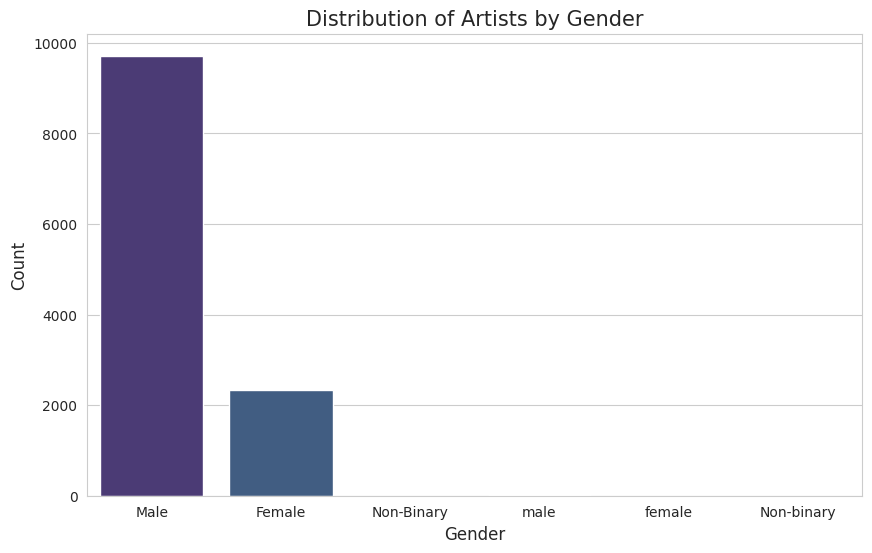

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set_style('whitegrid')

# Create a countplot of the 'Gender' column
plt.figure(figsize=(10, 6))
sns.countplot(data=artists, x='Gender', palette='viridis')
plt.title('Distribution of Artists by Gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

도표를 보면 MoMA 컬렉션에 **여성 아티스트보다 남성 아티스트가 훨씬 더 많다는 것을 알 수 있습니다.** 

성별이 명시되지 않은 아티스트도 다수 있습니다.

이는 컬렉션에 포함된 아티스트의 성별 불균형을 시사할 수 있습니다. 
그러나 미술계의 역사적 편견과 같은 다른 요인에 의한 불균형일 가능성도 있습니다.

다음으로 국적별 아티스트 분포를 살펴보겠습니다.

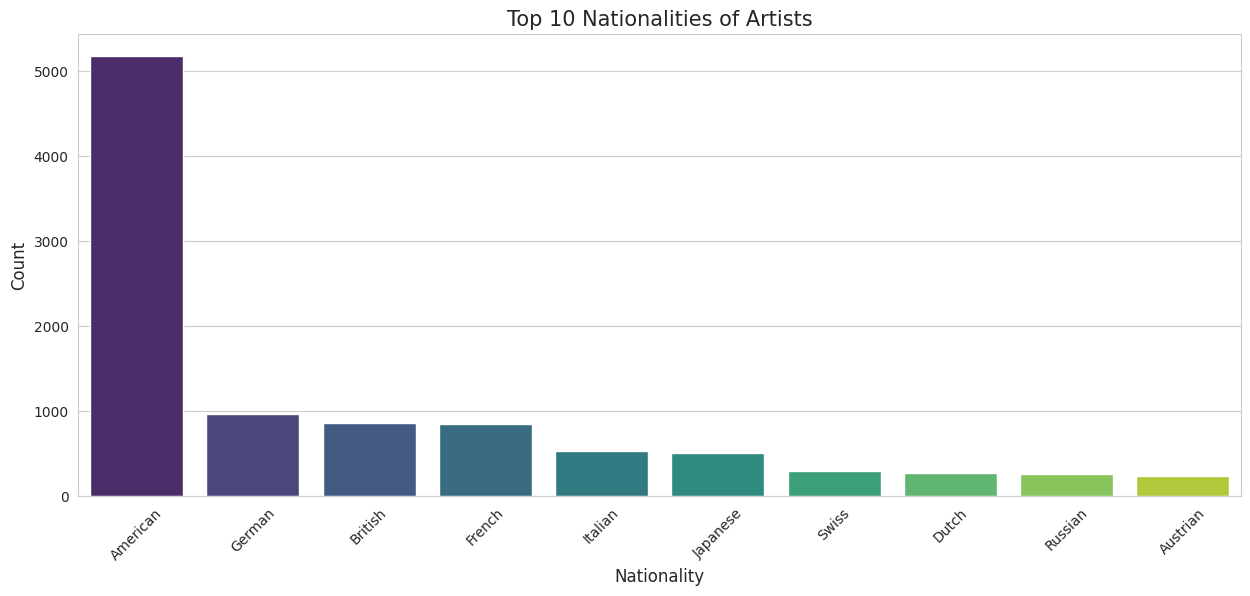

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
nationality_count = artists['Nationality'].value_counts().head(10)
sns.barplot(x=nationality_count.index, y=nationality_count.values, palette='viridis')
plt.title('Top 10 Nationalities of Artists', fontsize=15)
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


## 막대 그래프는 대표 예술가의 상위 10개 국적을 기반으로 MoMA 컬렉션의 구성을 보여줍니다.

데이터는 대부분의 예술가가 미국 국적을 가지고 있으며 프랑스, ​​영국, 독일 및 이탈리아 예술가가 그 뒤를 잇고 있음을 나타냅니다. 

이 분포는 MoMA가 서양 예술, 특히 미국과 유럽 작품에 중점을 두고 있음을 시사합니다.

다음으로 예술가들의 출생 연도를 분석하여 컬렉션에 가장 많이 등장하는 역사적 시기를 파악해 보겠습니다.


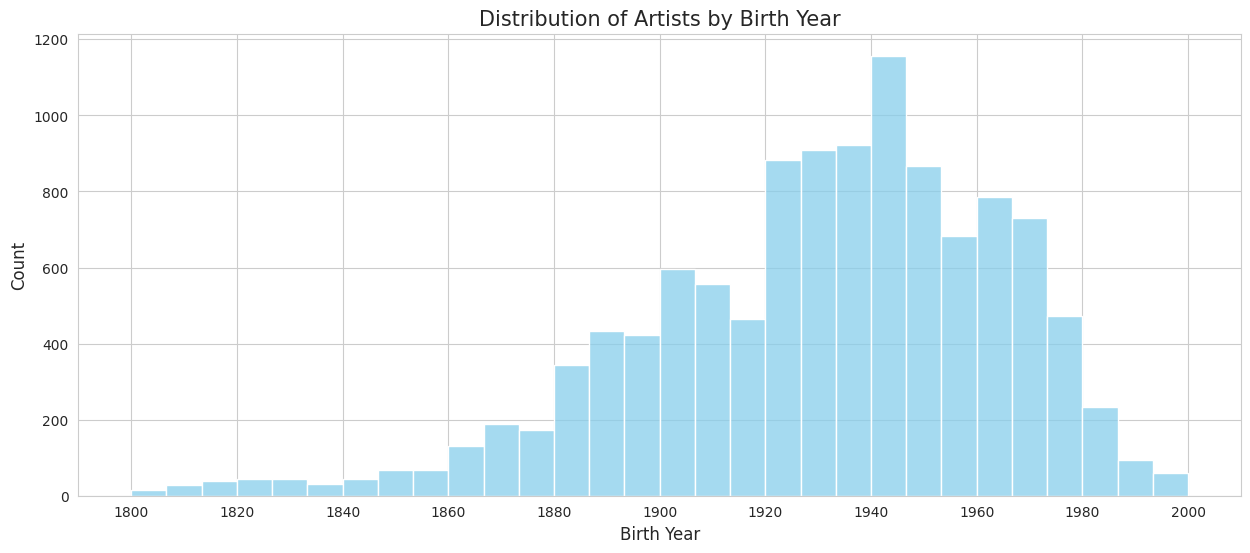

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
# Exclude rows where 'BeginDate' is 0 and filter the range between 1800 and 2000
birth_years = artists[(artists['BeginDate'] != 0) & (artists['BeginDate'].between(1800, 2000))]['BeginDate']
sns.histplot(birth_years, bins=30, color='skyblue')
plt.xticks(range(1800, 2001, 20))  # Set x-axis ticks every 20 years
plt.title('Distribution of Artists by Birth Year', fontsize=15)
plt.xlabel('Birth Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


## 이 히스토그램은 MoMA 컬렉션에 포함된 예술가의 출생 연도별 분포를 보여줍니다. 
몇가지 통찰을 얻을 수 있습니다.

1. 각 연도에 태어난 예술가의 수가 19세기 후반부터 급격히 증가하여 1930년대와 1940년대에 정점을 찍은 후 점차 감소하는 것을 볼 수 있습니다. 
이는 박물관이 근현대 미술에 집중하고 있다는 점입니다.

2. 위의 막대그래프에서 모마가 서양 미술에 중점을 둔다는 가설을 세웠습니다. 
다음과 같은 분석으로 어느정도 설득력있다고 생각됩니다.

> 이 분석을 통해 성별, 국적 및 역사적 시기에 따른 모마 컬렉션의 예술가 대표성에 대한 몇 가지 인사이트를 얻을 수 있었습니다. 

>분산이 집중되었던 부분을 더 자세히 보겠습니다.



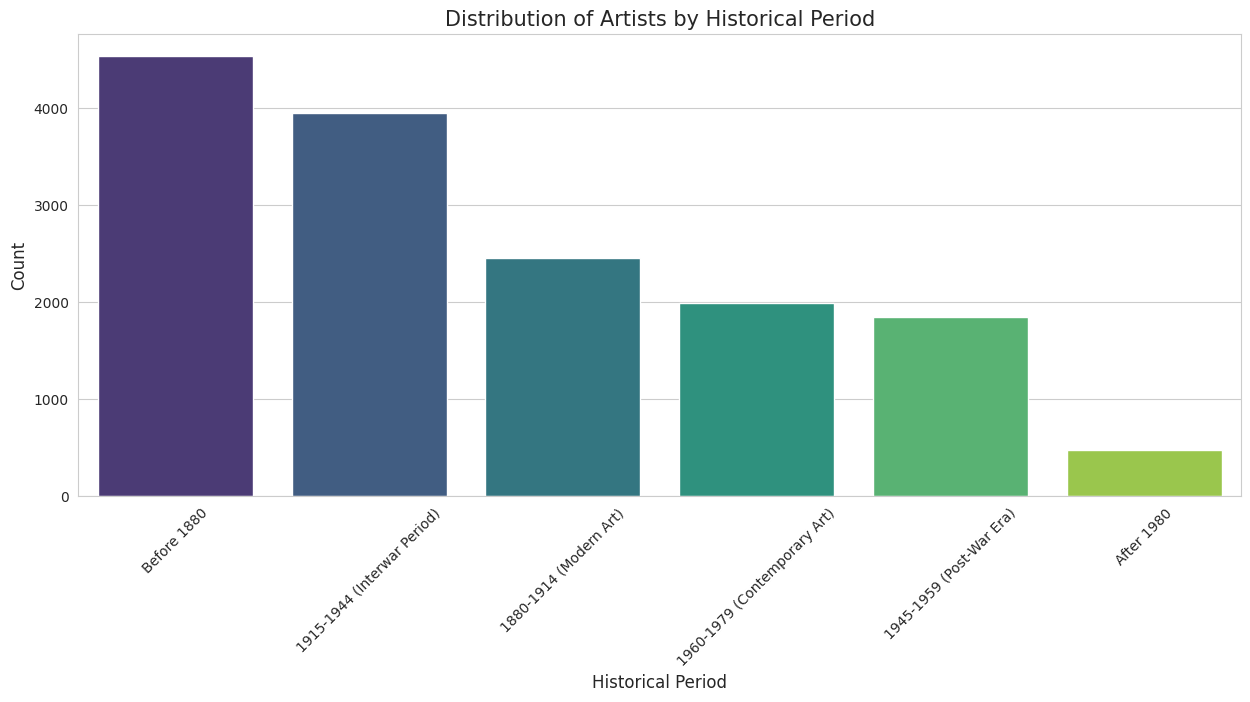

In [ ]:
# Define a function to categorize birth year into historical periods
def categorize_period(year):
    if year < 1880:
        return 'Before 1880'
    elif year < 1915:
        return '1880-1914 (Modern Art)'
    elif year < 1945:
        return '1915-1944 (Interwar Period)'
    elif year < 1960:
        return '1945-1959 (Post-War Era)'
    elif year < 1980:
        return '1960-1979 (Contemporary Art)'
    else:
        return 'After 1980'

# Apply the function to the 'BeginDate' column
artists['Period'] = artists['BeginDate'].apply(categorize_period)

# Create a countplot of the 'Period' column
plt.figure(figsize=(15, 6))
sns.countplot(data=artists, x='Period', palette='viridis', order=artists['Period'].value_counts().index)
plt.title('Distribution of Artists by Historical Period', fontsize=15)
plt.xlabel('Historical Period', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## 막대 그래프는 출생 연도를 기준으로 MoMA 컬렉션에 포함된 예술가들의 시대별 분포를 보여줍니다.

1880이전은 절대값이 비교적 많습니다. 약 80년간의 기간이기 때문이다. 
고려하여 판단하면 강한 추세는 아닌 것 같습니다. 
어쨌든 19세기 후반 이전도 중요하게 다루고 있다는 것은 알 수 있습니다.

주목해야할 점은
1915년부터 1944년까지, 즉 전간기 시대에 해당하는 시기에 가장 많은 예술가가 태어났음을 알 수 있습니다. 

그 다음으로는 1880년부터 1914년까지의 근대, 1945년부터 1959년까지의 전후 시대가 그 뒤를 있습니다.

이는 MoMA 컬렉션이 19세기 후반과 20세기 초중반의 예술가들에 중점을 두고 있음을 시사합니다. 

이 분석을 통해 성별, 국적 및 역사적 시기에 따른 MoMA 컬렉션의 예술가 대표성에 대한 몇 가지 인사이트를 얻을 수 있었습니다. 

이는 개략적인 분석이며 이러한 추세에 영향을 미칠 수 있는 다른 많은 요인이 있다는 점에 유의해야 합니다.

더 자세한 이해를 위해 다른 특성별로 예술가의 대표성을 살펴보거나,
컬렉션에 포함된 예술 작품을 조사하거나, MoMA 컬렉션을 다른 예술 컬렉션과 비교하는 등 추가 분석을 수행할 수 있습니다.

여기까지 전간기 시대의 서양 미술이 주목을 많이 받는 것은 알았습니다.

다음으로 무슬림이 대다수인 국가 출신 예술가들의 대표성을 분석해 보겠습니다.
무슬림 국가를 선택한 이유는 작품 구성에서 비교적 데이터가 적다고 생각했습니다.
이를 통해 문화적, 종교적 배경에 따른 MoMA 컬렉션의 다양성을 이해하는 데 도움이 될 것이라고 생각했습니다.

다음 국가를 대다수 무슬림 국가로 간주하겠습니다: 
> 아프가니스탄, 알바니아, 알제리, 아제르바이잔, 방글라데시, 브루나이, 부르키나파소, 차드, 코모로, 지부티, 이집트, 감비아, 기니, 인도네시아, 이란, 이라크, 요르단, 카자흐스탄, 코소보, 쿠웨이트, 키르기스스탄, 레바논, 리비아, 말레이시아, 몰디브, 말리, 모리타니아, 모로코, 니제르, 나이지리아(북부 지역), 오만, 파키스탄, 팔레스타인, 카타르, 사우디아라비아, 세네갈, 시에라리온, 소말리아, 수단, 시리아, 타지키스탄, 튀니지, 터키, 투르크메니스탄, 아랍에미리트연합, 우즈베키스탄 및 예멘. 

출처: 나무위키

In [ ]:
# List of countries that are majority Muslim
muslim_countries = ['Afghanistan', 'Albania', 'Algeria', 'Azerbaijan', 'Bangladesh', 'Brunei', 'Burkina Faso', 'Chad', 'Comoros', 'Djibouti', 'Egypt', 'Gambia', 'Guinea', 'Indonesia', 'Iran', 'Iraq', 'Jordan', 'Kazakhstan', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Libya', 'Malaysia', 'Maldives', 'Mali', 'Mauritania', 'Morocco', 'Niger', 'Nigeria', 'Oman', 'Pakistan', 'Palestine', 'Qatar', 'Saudi Arabia', 'Senegal', 'Sierra Leone', 'Somalia', 'Sudan', 'Syria', 'Tajikistan', 'Tunisia', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Yemen']

# Filter the DataFrame to include only artists from majority Muslim countries
muslim_artists = artists[artists['Nationality'].isin(muslim_countries)]

# Create a countplot of the 'Nationality' column
plt.figure(figsize=(15, 6))
sns.countplot(data=muslim_artists, x='Nationality', palette='viridis', order=muslim_artists['Nationality'].value_counts().index)
plt.title('Distribution of Artists from Majority Muslim Countries', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


ValueError: ignored

<Figure size 1500x600 with 0 Axes>

In [ ]:
muslim_artists.shape[0] # 재검증

0

이슬람이 국적인 작가는 0명입니다.

아무래도 데이터 세트에 대다수 무슬림 국가 출신의 아티스트가 없는 것으로 보입니다. 

이는 데이터가 포괄적이지 않거나 MoMA가 해당 국가의 예술가로부터 작품을 수집하지 않는 등 다양한 이유일 수 있습니다.

이 부분은 박물관이 잠재적으로 다양성을 높일 수 있는 분야입니다.

그럼 이슬람의 피가 섞인 이슬람계 미국인은 어떨까요? Nationality를 분석해보겠습니다.

아래 막대형 막대 그래프는 MoMA 컬렉션에서 무슬림이 대다수인 국적의 예술가 분포를 보여줍니다.

 이란, 터키, 이집트 등 무슬림이 대다수인 여러 국적의 아티스트가 컬렉션에 포함되어 있음을 알 수 있습니다.
 
  그러나 이러한 국적의 예술가 수는 컬렉션의 전체 예술가 수에 비해 상대적으로 적습니다.

이는 MoMA 컬렉션에 다양한 문화적, 종교적 배경을 가진 예술가들의 작품이 포함되어 있지만 무슬림이 대다수인 국적의 예술가들은 잘 알려지지 않았다는 것을 시사합니다.

이는 박물관이 잠재적으로 다양성을 높일 수 있는 분야입니다.

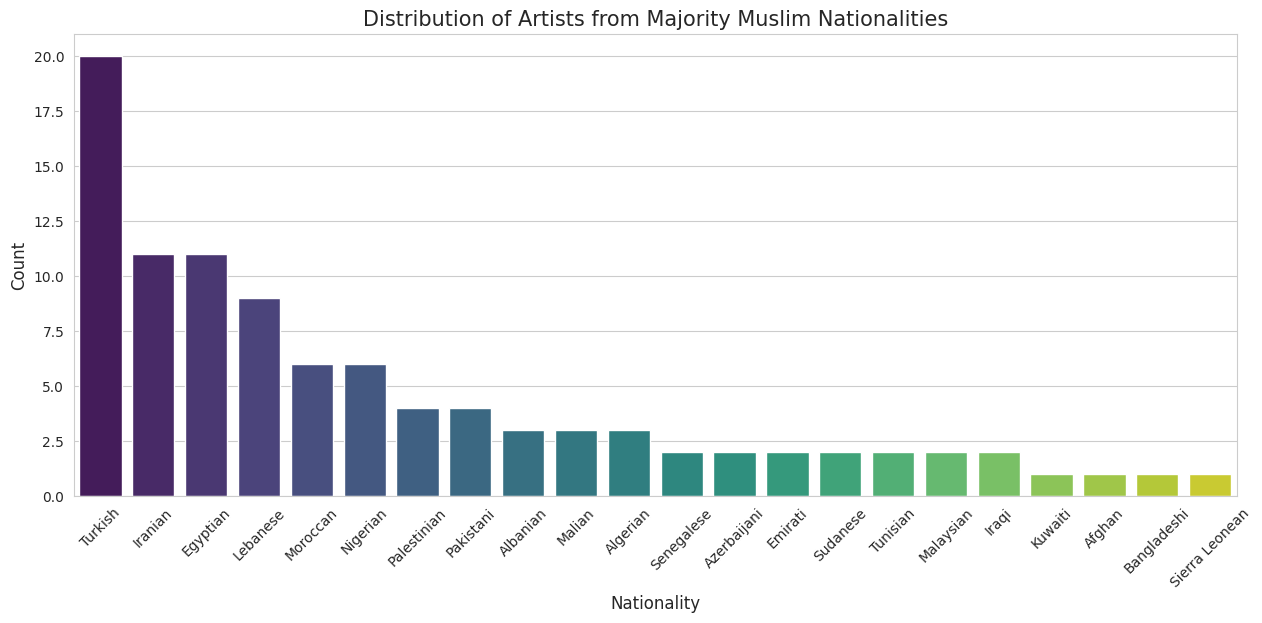

In [35]:
# List of nationalities that are majority Muslim
muslim_nationalities = ['Afghan', 'Albanian', 'Algerian', 'Azerbaijani', 'Bangladeshi', 'Bruneian', 'Burkinabe', 'Chadian', 'Comorian', 'Djiboutian', 'Egyptian', 'Gambian', 'Guinean', 'Indonesian', 'Iranian', 'Iraqi', 'Jordanian', 'Kazakhstani', 'Kosovar', 'Kuwaiti', 'Kyrgyzstani', 'Lebanese', 'Libyan', 'Malaysian', 'Maldivian', 'Malian', 'Mauritanian', 'Moroccan', 'Nigerien', 'Nigerian', 'Omani', 'Pakistani', 'Palestinian', 'Qatari', 'Saudi', 'Senegalese', 'Sierra Leonean', 'Somali', 'Sudanese', 'Syrian', 'Tajikistani', 'Tunisian', 'Turkish', 'Turkmen', 'Emirati', 'Uzbekistani', 'Yemeni']

# Filter the DataFrame to include only artists from majority Muslim nationalities
muslim_artists = artists[artists['Nationality'].isin(muslim_nationalities)]

# Create a countplot of the 'Nationality' column
plt.figure(figsize=(15, 6))
sns.countplot(data=muslim_artists, x='Nationality', palette='viridis', order=muslim_artists['Nationality'].value_counts().index)
plt.title('Distribution of Artists from Majority Muslim Nationalities', fontsize=15)
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

막대형 막대 그래프는 MoMA 컬렉션에서 무슬림이 대다수인 국적의 예술가 분포를 보여줍니다. 이란, 터키, 이집트 등 무슬림이 대다수인 여러 국적의 아티스트가 컬렉션에 포함되어 있음을 알 수 있습니다. 그러나 이러한 국적의 예술가 수는 컬렉션의 전체 예술가 수에 비해 상대적으로 적습니다.

이는 MoMA 컬렉션에 다양한 문화적, 종교적 배경을 가진 예술가들의 작품이 포함되어 있지만 무슬림이 대다수인 국적의 예술가들은 잘 알려지지 않았다는 것을 시사합니다. 

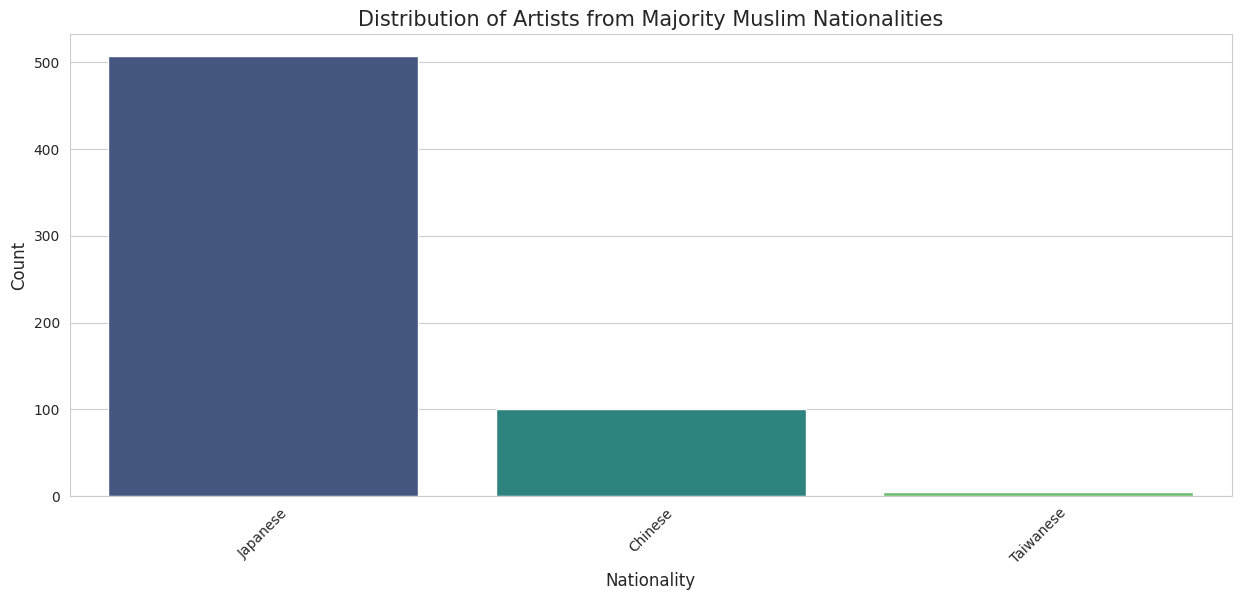

In [ ]:
# List of nationalities that are majority Muslim
East_Asian_nationalities = [
"Chinese",
"Japanese",
"South Korean",
"North Korean",
"Mongolian",
"Taiwanese"
]
# Filter the DataFrame to include only artists from majority Muslim nationalities
East_Asian_artists = artists[artists['Nationality'].isin(East_Asian_nationalities)]

# Create a countplot of the 'Nationality' column
plt.figure(figsize=(15, 6))
sns.countplot(data=East_Asian_artists, x='Nationality', palette='viridis', order=East_Asian_artists['Nationality'].value_counts().index)
plt.title('Distribution of Artists from Majority Muslim Nationalities', fontsize=15)
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

처첨합니다

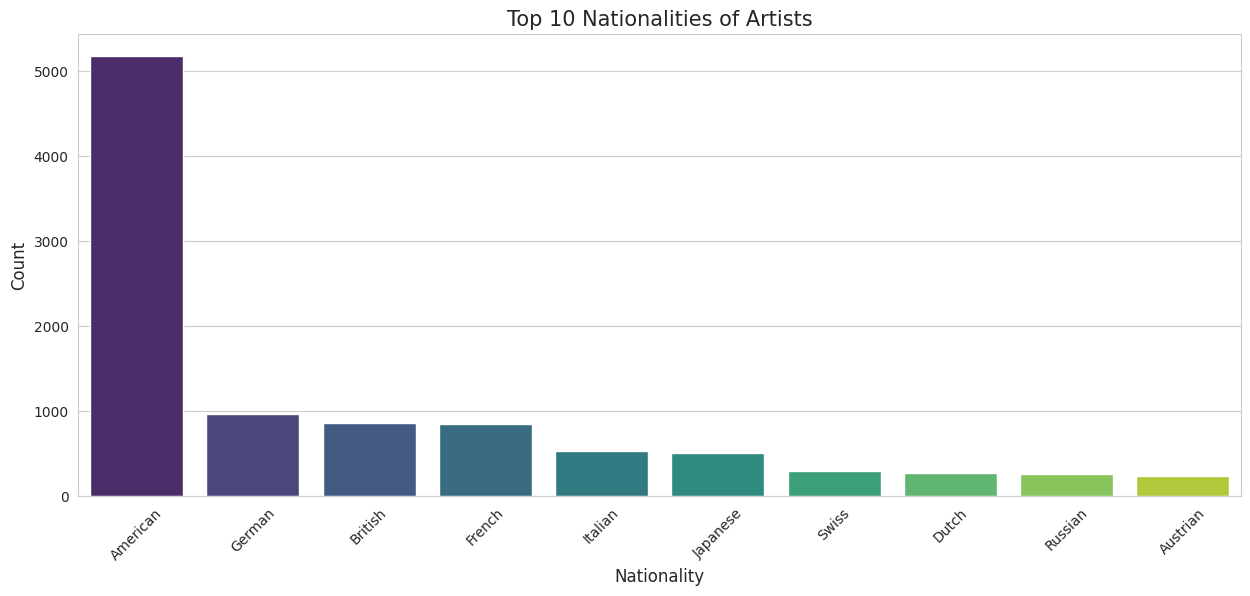

In [ ]:
# Create a barplot of the 'Nationality' column
plt.figure(figsize=(15, 6))
nationality_count = artists['Nationality'].value_counts().head(10)
sns.barplot(x=nationality_count.index, y=nationality_count.values, palette='viridis')
plt.title('Top 10 Nationalities of Artists', fontsize=15)
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

위의 막대 그래프는 MoMA 컬렉션에 포함된 아티스트의 상위 10개 국적을 보여줍니다. 

미국 예술가들이 컬렉션을 주도하고 있으며 프랑스, 독일, 영국, 이탈리아 예술가들이 그 뒤를 잇고 있음을 알 수 있습니다.

이는 서양 미술, 특히 미국과 유럽 미술에 중점을 둔 박물관의 특성을 반영하는 것일 수 있습니다. 그러나 컬렉션에 다양한 시대와 스타일을 아우르는 이들 국가의 다양한 예술품이 포함되어 있을 가능성도 있습니다.

# 제언

미국 미술의 다양성을 강조: 컬렉션에 포함된 대부분의 예술가가 서양인 만큼, 풍부한 다양성을 보여주는 전시회를 큐레이팅하는 것이 좋습니다. 여기에는 다양한 미술 사조, 지역 미술계 또는 미국 미술계에서 LGBT그룹에 초점을 맞춘 주제별 전시회가 포함될 수 있습니다.

여성 예술가 조명: 컬렉션에 포함된 예술가들의 성별 불균형을 고려할 때, 여성 예술가들이 등장하는 전시회는 근현대 미술에 대한 그들의 공헌을 강조하는 강력한 방법이 될 수 있습니다. 또한 여성 아티스트의 작품을 더 많이 확보하고 컬렉션의 성별 균형을 맞추기 위해 노력할 수 있는 기회가 될 수 있습니다.

강점이용하기: 19세기부터 21세기까지 고루 분포되어 있다는 것은 큰 강점입니다. 
시대별로 작품을 전시하는 것도 좋은 방법일 것입니다.

무슬림 다수 국적의 예술가로 지평을 넓히세요: 무슬림이 다수인 국적의 예술가들은 현재 컬렉션에서 과소 대표되고 있습니다. 이러한 국적의 예술가들이 참여하는 전시회를 개최하거나 무슬림 세계의 현대 미술에 초점을 맞춘 특별 전시회를 개최하는 것도 고려해 보세요. 이는 박물관의 문화적 지평을 넓히고 새로운 관객과 소통할 수 있는 특별한 기회가 될 수 있습니다.